In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List
import geopandas as gpd
a = sys.path.append('../modules/')
b = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial_all.csv', sep=',')
data_continuacao_400 = pd.read_table('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/Data_mag_morro_do_forno_up_2.csv', sep=',')
data_residuo = pd.read_table('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/Data_mag_morro_do_forno_residuo_2.csv', sep=',')

In [3]:
data_cubo

,Long(°),Lat(°),Anomalia Magnética(nT)
0,-42.05000,-23.0500,0.0
1,-42.05000,-23.0487,0.0
2,-42.05000,-23.0474,0.0
3,-42.05000,-23.0461,0.0
4,-42.05000,-23.0448,0.0
...,...,...,...
10196,-41.94001,-22.9252,0.0
10197,-41.94001,-22.9239,0.0
10198,-41.94001,-22.9226,0.0
10199,-41.94001,-22.9213,0.0


In [4]:
rj = gpd.read_file('RJ_shape.shp')

In [5]:
lat = np.array(data_cubo['Lat(°)'])
long = np.array(data_cubo['Long(°)'])
anomaly = np.array(data_cubo['Anomalia Magnética(nT)'])

lat_up = np.array(data_continuacao_400['Latitude (°)'])
long_up = np.array(data_continuacao_400['Longitude (°)'])
anomaly_continuacao = np.array(data_continuacao_400['Anomalia Magnética(nT)'])


anomaly_residuo = np.array(data_residuo['Anomalia Magnética(nT)'])

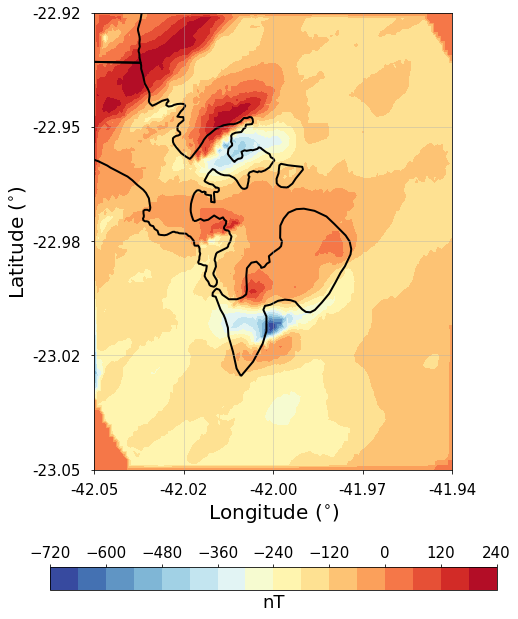

In [42]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20)
plt.ylim(lat.min(),lat.max())
plt.xlim(long.min(),long.max())
plt.xticks(np.linspace(long.min(),long.max(), 5))
plt.yticks(np.linspace(lat.min(),lat.max(), 5))
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/mapa_total.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/mapa_total.pdf", dpi=300, bbox_inches='tight')
#cbar = plt.colorbar(orientation="horizontal")
#cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
#cbar.set_label("nT",fontsize=18, loc="center")
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")
ax.tick_params(labelsize = 15, pad=10)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.grid(alpha=0.5)

#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_arraial_real.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_arraial_real.png", dpi=300, bbox_inches='tight')

plt.show()


In [7]:
x_space = [-22.945,-22.945,-22.965,-22.965,-22.945]
y_space = [-42.024,-41.99,-41.99,-42.024,-42.024]

import utm

utm_1= utm.from_latlon(-22.945, -42.024,23, 'K')
utm_2= utm.from_latlon(-22.965, -41.990, 23, 'K')
print(utm_1)
print(utm_2)
print(min(long))

(805204.6281652721, 7459476.747998359, 23, 'K')
(808648.2967912531, 7457189.50430706, 23, 'K')
-42.05


In [8]:
data_bolinhas = pd.read_table('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/final_ind_lat_long_1.csv', sep=',')

In [9]:
lat_= np.reshape(np.array(data_bolinhas["lat"]), (30))
long_= np.reshape(np.array(data_bolinhas["long"]), (30))

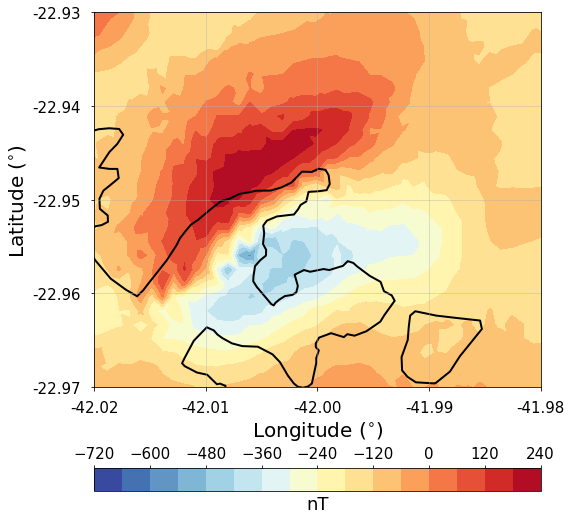

In [25]:
fig, ax = plt.subplots(figsize=(8, 10))
anomaly_ = plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
#space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
#plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20)
#space_plot = plt.scatter(long_,lat_, c=None, s=200.0)
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.xticks(np.linspace(-42.025,-41.98, 5), fontsize = 15)
plt.yticks(np.linspace(-22.97,-22.935, 5), fontsize = 15)
ax.tick_params(labelsize = 15, pad=10)

cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.grid(alpha=0.5)

#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_real.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_real.png", dpi=300, bbox_inches='tight')

plt.show()

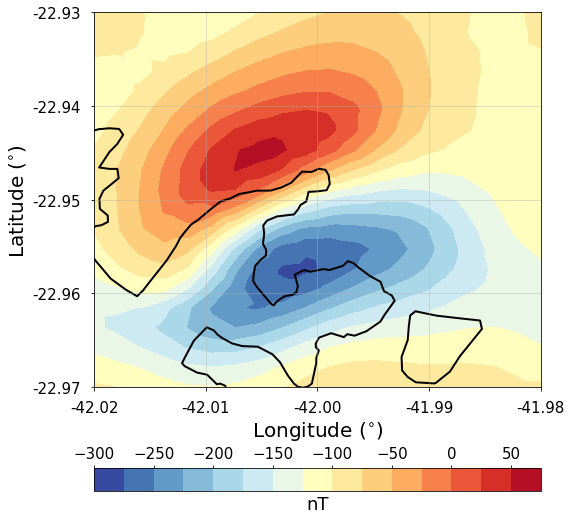

In [26]:
fig, ax = plt.subplots(figsize=(8, 10))
anomaly_ = plt.tricontourf(lat_up.flatten(), long_up.flatten(), anomaly_continuacao.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
#space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
#plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20)
#space_plot = plt.scatter(long_,lat_, c=None, s=200.0)
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.xticks(np.linspace(-42.025,-41.98, 5), fontsize = 15)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

plt.yticks(np.linspace(-22.97,-22.935, 5), fontsize = 15)
ax.tick_params(labelsize = 15, pad=10)
plt.grid(alpha=0.5)

cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")

#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_continuacao.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_continuacao.png", dpi=300, bbox_inches='tight')

plt.show()

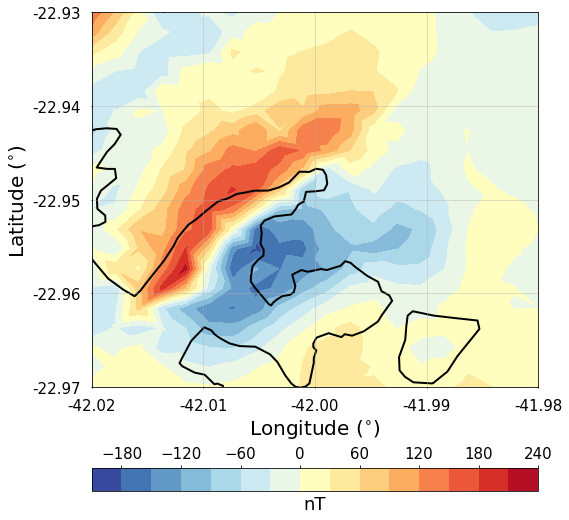

In [27]:
fig, ax = plt.subplots(figsize=(8, 10))
anomaly_ = plt.tricontourf(lat_up.flatten(),long_up.flatten(),anomaly_residuo.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
#space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
#plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20)
#space_plot = plt.scatter(long_,lat_, c=None, s=200.0)
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.xticks(np.linspace(-42.025,-41.98, 5), fontsize = 15)
plt.yticks(np.linspace(-22.97,-22.935, 5), fontsize = 15)
ax.tick_params(labelsize = 15, pad=10, length = 1.0)
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.grid(alpha=0.5)

#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_residuo.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/anomalia_morro_do_forno_residuo.png", dpi=300, bbox_inches='tight')


plt.show()

In [13]:
d = [22, 150, 87, 300, 78, 96, 54, 200, 600, 402] #Converter as distEncias de m pra km
d = np.array(d)
dm = np.mean(d)
print(dm)
delta_d = (1/(len(d)-1))*np.sum((d - dm)**2)
#delta_d2 = (1/(len(d)-1))*(np.sum((d - dm)**2 /(np.max(d)- np.min(d))))

198.9


In [14]:
print(delta_d)
#print(delta_d2)

33862.322222222225


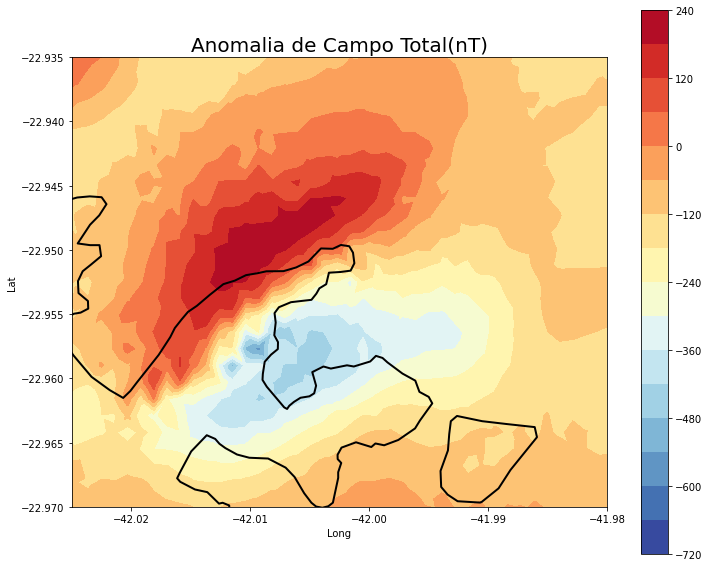

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.colorbar();

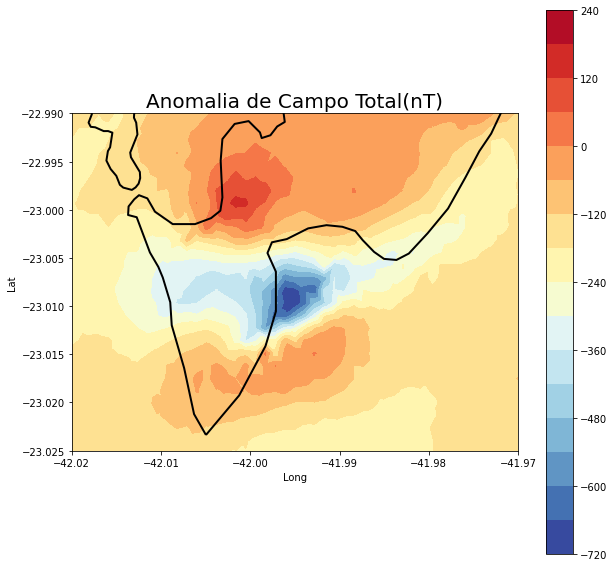

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.ylim(-23.025, -22.990)
plt.xlim(-42.02,-41.97)
plt.colorbar();